In [11]:
# Working through the Applied Geospatial Data Science with Python book
# located at https://github.com/PacktPublishing/Applied-Geospatial-Data-Science-with-Python
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
### Setting up the data_path
data_path = 'Data-pt1\\'

In [13]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
capitals = gpd.read_file(data_path + 'ne_110m_populated_places\\ne_110m_populated_places.shp')
capitals = capitals[capitals["FEATURECLA"]=="Admin-0 capital"]
grat = gpd.read_file(data_path + 'Graticule\\ne_110m_graticules_10.shp')

C:\Users\erics\AppData\Local\Temp\ipykernel_122756\3234652918.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [19]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
world.crs == capitals.crs == grat.crs

True

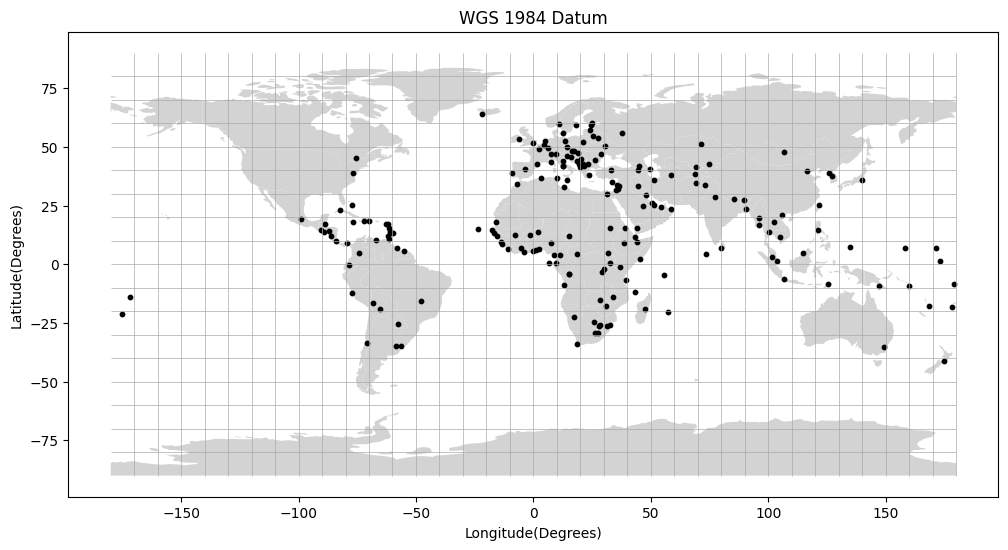

In [20]:
fig, ax = plt.subplots(figsize=(12,10))
world.plot(ax=ax, color="lightgray")
capitals.plot(ax=ax, color="black", markersize=10, marker="o")
grat.plot(ax=ax, color="darkgray", linewidth=0.5)
ax.set(xlabel="Longitude(Degrees)",
       ylabel="Latitude(Degrees)",
       title="WGS 1984 Datum")
plt.show()

In [21]:
world_ae = world.to_crs("ESRI:54032")
capitals_ae = capitals.to_crs("ESRI:54032")
graticules_ae = grat.to_crs("ESRI:54032")
world_ae.crs

<Projected CRS: ESRI:54032>
Name: World_Azimuthal_Equidistant
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Azimuthal_Equidistant
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

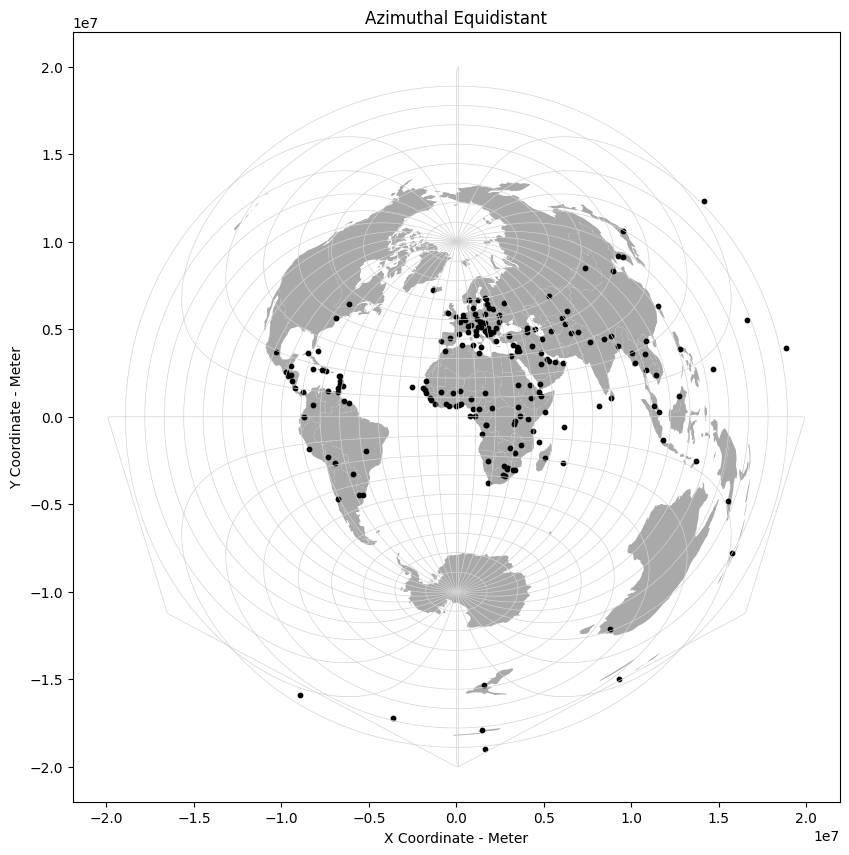

In [24]:
def plot_map_layers(gdf_1, gdf_2, gdf_3, name, unit):
    fig, ax = plt.subplots(figsize=(12,10))
    gdf_1.plot(ax=ax, color="darkgray")
    gdf_2.plot(ax=ax, color="black", markersize=10, marker="o")
    gdf_3.plot(ax=ax, color="lightgray", linewidth=0.5)
    ax.set(xlabel="X Coordinate - " + unit,
           ylabel="Y Coordinate - " + unit,
           title=name
           )
plt.show()
plot_map_layers(world_ae, capitals_ae, graticules_ae, "Azimuthal Equidistant", "Meter")